## Human Activity Prediction using KNN and SVC

In [1]:
import numpy as np
import pandas as pd
import os



# Dtale
# - add "enable_custom_filters=True" to your dtale.show call
import dtale
import dtale.global_state as global_state
global_state.set_app_settings(dict(enable_custom_filters=True))
global_state.set_chart_settings({'scatter_points': 25000, '3d_points': 40000})


Turning on custom filtering. Custom filters are vulnerable to code injection attacks, please only use in trusted environments.


In [2]:
def getData():
    dataDir = os.path.join(os.getcwd(), "data")
    fileList = os.listdir(dataDir)

    # print(dataDir)
    print(fileList, type(fileList))


    for file in fileList:
        if "train" in os.path.join(dataDir,file):
            train_df = pd.read_csv(os.path.join(dataDir,file))
        elif "test" in os.path.join(dataDir,file):
            test_df = pd.read_csv(os.path.join(dataDir,file))
        else:
            print(f"{file} is not train or test")
    return train_df, test_df



train_df, test_df = getData()
# generate EDA report
d = dtale.show(train_df)
d.open_browser()

['test.csv', 'train.csv'] <class 'list'>


2023-11-21 20:11:57,306 - WARNING  - Custom filtering enabled. Custom filters are vulnerable to code injection attacks, please only use in trusted environments.


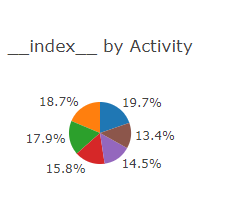
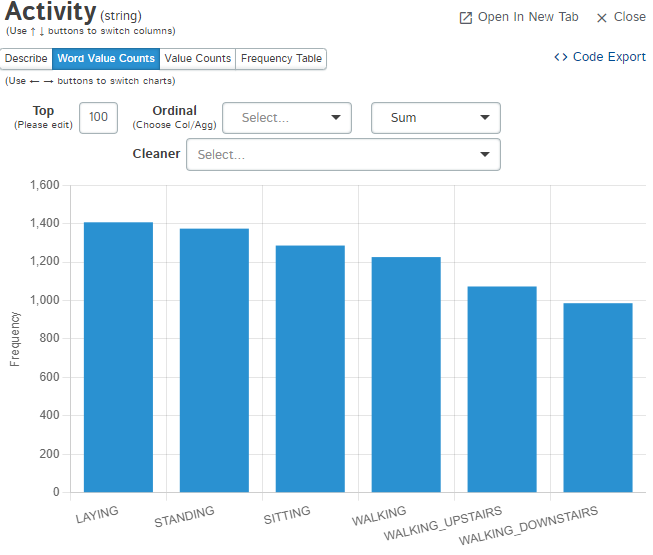

In [168]:
class prediction_pipeline():
    # data acuisition
#     X_train, X_test, y_train, y_test = getData()
    
#     def __init__(self,X_train, X_test, y_train, y_test):
#         self.X_train = X_train
#         self.X_test = X_test
#         self.y_train = y_train
#         self.y_test = y_test    
    from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

    def __init__(self, train, test):
        self.train = train
        self.test = test
               
        
    def doPreprocess(self):
        print(''' ********************** Data Preprocessing ************************************************** ''')

        ####### Import Data ##############
#         train, test= getData()
        
        train = self.train
        test = self.test
        ###########################################################
        y="Activity"

        ############ Feature Encoding #############################
#         from sklearn import preprocessing
#         encoder = preprocessing.LabelEncoder()
#         ## Feature Encoding train - Activity ##
#         train[y] = encoder.fit_transform(train[y])
#         ## Feature Encoding test
#         test[y] = encoder.transform(test[y])
#         # Print the mapping between original labels and encoded labels
#         activity_classes_dict = {}
#         for original_label, encoded_label in zip(encoder.classes_, encoder.transform(encoder.classes_)):
#             activity_classes_dict[encoded_label]=original_label
#             print(f"{original_label}: {encoded_label}")
        
        
        
        ###########################################################
        y_train, y_test = train["Activity"], test["Activity"]
        X_train, X_test = pd.DataFrame(train.drop(['Activity','subject'],axis=1)), pd.DataFrame(test.drop(['Activity','subject'],axis=1))

        ###########################################################
        # Dimension of Train and Test set 
        print("Dimension of Train set",X_train.shape)
        print("Dimension of Test set",X_test.shape,"\n")

        """ Total Number of Continous and Categorical features in the training set"""
        num_cols = X_train._get_numeric_data().columns
        print("Number of numeric features:",num_cols.size)

        """ list all the features in a variable"""
        names_of_predictors = list(X_train.columns.values)
    #     print(names_of_predictors)

        ''' Scalling on X '''
        from sklearn.preprocessing import StandardScaler
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

#         return X_train_scaled, X_test_scaled, y_train, y_test, activity_classes_dict
        return X_train_scaled, X_test_scaled, y_train, y_test
 
    def doBuildModel(self,x_train, y_train, x_test, n):
        from sklearn.neighbors import KNeighborsClassifier
        from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
        
        model = KNeighborsClassifier(n_neighbors=n)
        model.fit(x_train, y_train)
        y_preds = model.predict(x_test)
        
        """Write the code to find the accuracy on test dataset """
        print((accuracy_score(y_test,y_preds)*100),'%')
    
        return y_preds
   
    def doCheckAccuracy_KNN(self,x_train, y_train, x_test,y_test, n):
        print(''' ********************** SVC ************************************************** ''')

        import matplotlib.pyplot as plt
        from sklearn.neighbors import KNeighborsClassifier
        from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
        
        
        self.x_train = x_train
        self.y_train = y_train
        self.x_test = x_test
        self.y_test = y_test
        self.n = n
        
        scores=[]
        for i in range(1,self.n):
            model = KNeighborsClassifier(n_neighbors=i)
            model.fit(self.x_train, self.y_train)
            y_preds = model.predict(self.x_test)
            scores.append(accuracy_score(self.y_test,y_preds))
        
        
        
        print(scores)
        
        xticks = range(1,self.n)
        plt.figure(figsize=(12,5))
        plt.plot(xticks,scores,color='red', linestyle='solid', marker='o',
         markerfacecolor='blue', markersize=5)
        plt.xlabel("Number of neighbors")
        plt.ylabel("Accuracy scores")
        plt.xticks(xticks)

        plt.show()
        
        
        return

#     def doCheckAccuracy_SVC(self,x_train, y_train, x_test,y_test, activity_classes_dict):
    def doCheckAccuracy_SVC(self,x_train, y_train, x_test,y_test):
        print(''' ********************** SVC ************************************************** ''')
        import matplotlib.pyplot as plt
        from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
        from sklearn.svm import SVC, LinearSVC, NuSVC
        from sklearn.metrics import ConfusionMatrixDisplay
        
        self.x_train = x_train
        self.y_train = y_train
        self.x_test = x_test
        self.y_test = y_test
#         self.activity_classes_dict = activity_classes_dict
        
#         #         map labels into series       
#         self.y_train.replace(activity_classes_dict, inplace=True)
#         self.y_test.replace(activity_classes_dict, inplace=True)
        
        model = SVC()
        model.fit(self.x_train, self.y_train)
        y_preds = model.predict(self.x_test)
        score = accuracy_score(self.y_test,y_preds)*100
        
        
        
        
        print(f"Accuracy using SVC model is {score} %")
        

#         map labels into array
#         label_mapper = np.vectorize(lambda x: activity_classes_dict.get(x, x))
#         y_preds = label_mapper(y_preds)

        
        print(classification_report(self.y_test, y_preds, sample_weight=None, digits=4))
        class_report = classification_report(self.y_test, y_preds, sample_weight=None, digits=4)
        print(''' ********************** SVC>> Confusion Matrix ************************************** ''')
        
        class_labels = model.classes_
        cm = confusion_matrix(self.y_test, y_preds, normalize='true' , labels=class_labels)
        disp = ConfusionMatrixDisplay(cm,display_labels=class_labels)    
        disp = disp.plot(cmap=plt.cm.Blues,values_format='g')
        plt.tight_layout() 
        plt.xticks(rotation=45, ha='right')
        plt.show()
        
        
        return class_report, y_preds
    
#     def doStart(self):
#         X_train_scaled, X_test_scaled, y_train, y_test = self.doPreprocess()
# #         y_preds = self.doBuildModel(X_train_scaled, y_train, X_test_scaled, 20)
#         scores = self.doCheckAccuracy(X_train_scaled, y_train, X_test_scaled, y_test, 50)
    
    
#         return scores
        




In [169]:
train_df, test_df = getData()
predictor = prediction_pipeline(train_df, test_df )
# X_train_scaled, X_test_scaled, y_train, y_test, activity_classes_dict = predictor.doPreprocess()
X_train_scaled, X_test_scaled, y_train, y_test = predictor.doPreprocess()

['test.csv', 'train.csv'] <class 'list'>
 ********************** Data Preprocessing ************************************************** 
Dimension of Train set (7352, 561)
Dimension of Test set (2947, 561) 

Number of numeric features: 561


 ********************** SVC ************************************************** 
[0.8534102477095351, 0.8486596538853071, 0.8737699355276553, 0.8778418730912793, 0.8836104513064132, 0.8853070919579233, 0.8887003732609433, 0.8893790295215473, 0.8897183576518494, 0.8927723108245673, 0.8866644044791313, 0.8890397013912453, 0.8903970139124533, 0.8887003732609433, 0.8890397013912453, 0.8924329826942654, 0.8903970139124533, 0.8920936545639634, 0.8856464200882254, 0.8893790295215473, 0.8846284356973193, 0.8893790295215473, 0.8849677638276213, 0.8887003732609433, 0.8842891075670173, 0.8873430607397353, 0.8842891075670173, 0.8870037326094333, 0.8825924669155073, 0.8829317950458093, 0.8822531387852053, 0.8819138106549033, 0.8802171700033933, 0.8812351543942993, 0.8798778418730913, 0.8819138106549033, 0.8815744825246012, 0.8832711231761113, 0.8795385137427892, 0.8819138106549033, 0.8764845605700713, 0.8788598574821853, 0.8751272480488632, 0.8771632168306752, 0.8747879199185612, 0.8747879199185612,

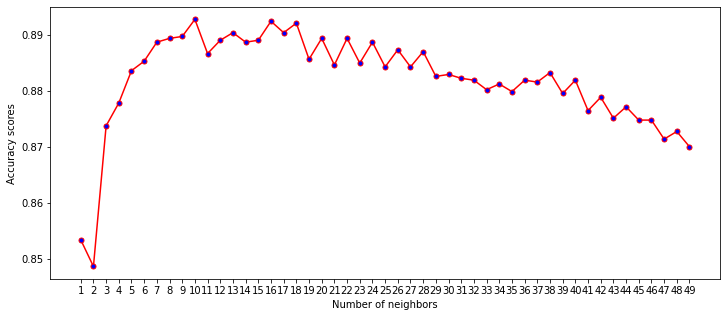

In [171]:
predictor.doCheckAccuracy_KNN(X_train_scaled, y_train, X_test_scaled, y_test, 50)
# class_report, y_preds = predictor.doCheckAccuracy_SVC(X_train_scaled, y_train, X_test_scaled, y_test, activity_classes_dict)
# class_report, y_preds = predictor.doCheckAccuracy_SVC(X_train_scaled, y_train, X_test_scaled, y_test)